# PCA Clustering
1. Use sentence-transformer to embed each sentence
1. Use `texthero` for PCA clustering
1. Examine the contents of each cluster 
2. Reference the map back to the sentence to determine an appropriate label for the entire cluster


In [1]:
!pip install texthero -q

In [2]:
import pandas as pd
import numpy as np
import texthero as hero
import os

# Identify the working directory and data files
working_directory = './pca_clustering'

# Create the working directory if needed
try:
    os.makedirs(working_directory, exist_ok=True)
except OSError as error:
    print(f"Error creating {working_directory}: {error}")

In [3]:
data_file = './data_stratification/qbj_2020_strata.csv'

# Read the data into a pandas dataframe
df = pd.read_csv(data_file,           # The data file being read, from the variable assignment above
                 on_bad_lines='warn', # This tells Pandas to only warn on bad lines vs causing an error
                 dtype='str')         # This tells Pandas to treat all numbers as words

df.head(3)

,Unnamed: 0,Unnamed: 0.1,FOI_TEXT,DEVICE_PROBLEM_CODE,DEVICE_PROBLEM_TEXT,GENERIC_NAME,DEVICE_REPORT_PRODUCT_CODE,UDI-DI,UDI-PUBLIC,DATE_OF_EVENT,REPORTER_OCCUPATION_CODE,REPORT_DATE,EVENT_LOCATION,SOURCE_TYPE
0,1969025,2146218,IT WAS REPORTED THAT THE TRANSMITTER LOST CONN...,3283,Wireless Communication Problem,CONTINUOUS GLUCOSE MONITOR,QBJ,NaN,NaN,07/30/2020,000,NaN,I,CONSUMER
1,1426265,1554877,IT WAS REPORTED THAT SIGNAL LOSS OVER ONE HOUR...,3283,Wireless Communication Problem,CONTINUOUS GLUCOSE MONITOR,QBJ,00386270000385,00386270000385,06/05/2020,000,NaN,I,CONSUMER
2,2609625,2840023,IT WAS REPORTED THAT TRANSMITTER FAILED ERROR ...,1435,No Device Output,CONTINUOUS GLUCOSE MONITOR,QBJ,00386270000385,00386270000385,10/05/2020,000,NaN,I,CONSUMER


In [4]:
df['pca'] = (df['FOI_TEXT'].pipe(hero.clean).pipe(hero.tfidf).pipe(hero.pca))
df.head(3)

,Unnamed: 0,Unnamed: 0.1,FOI_TEXT,DEVICE_PROBLEM_CODE,DEVICE_PROBLEM_TEXT,GENERIC_NAME,DEVICE_REPORT_PRODUCT_CODE,UDI-DI,UDI-PUBLIC,DATE_OF_EVENT,REPORTER_OCCUPATION_CODE,REPORT_DATE,EVENT_LOCATION,SOURCE_TYPE,pca
0,1969025,2146218,IT WAS REPORTED THAT THE TRANSMITTER LOST CONN...,3283,Wireless Communication Problem,CONTINUOUS GLUCOSE MONITOR,QBJ,NaN,NaN,07/30/2020,000,NaN,I,CONSUMER,"[0.19263589657647381, 0.13265680404591704]"
1,1426265,1554877,IT WAS REPORTED THAT SIGNAL LOSS OVER ONE HOUR...,3283,Wireless Communication Problem,CONTINUOUS GLUCOSE MONITOR,QBJ,00386270000385,00386270000385,06/05/2020,000,NaN,I,CONSUMER,"[-0.35695660942492, 0.012276621139660715]"
2,2609625,2840023,IT WAS REPORTED THAT TRANSMITTER FAILED ERROR ...,1435,No Device Output,CONTINUOUS GLUCOSE MONITOR,QBJ,00386270000385,00386270000385,10/05/2020,000,NaN,I,CONSUMER,"[-0.5052219402531327, -0.3139074418990158]"


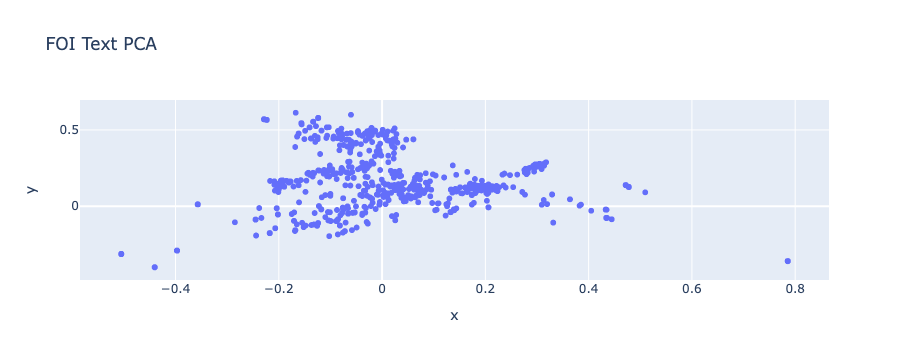

In [7]:
hero.scatterplot(df, col='pca', title='FOI Text PCA')